<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# Intro to Visualization Final Activity

We've made it this far, congratulations! I hope at this point that you are feeling confident in your ability to deploy python and matplotlib to create informative and attractive data visualizations! You should feel like you have a new tool in your scientific toolkit. I **also** hope that that this semester's activities have helped to reinforce some of your other python skills. The more you practice with things like loops, conditionals, and the various python data structures (lists, dictionaries, and dataframes) the less daunting they seem. As I've said many times, you can always look up the syntax again later, but every time you complete one of these notebooks you are building up base skills in computational thinking that I think will allow you to problem-solve in your own projects someday. 

So let's give you a chance to show off!

I've included a dataset in this folder called `BioMar.csv`. Your challenge is to summarize that data set using visualizations to create a set of figures that tell the 'story' of the data as you see it. Within the data folder I have included a an article (along with its supplementary data file) that describes this recent data from the marine zone of Area de Conservación Guanacaste (you'll see on the first page of the paper that this is part of a special issue of the journal Biotropica that I was involved in producing). The paper is describing the results of a new biodiversity surveying effort. The main concern is documenting previously undocumented marine species within the conservation area. 

Your answer should include AT LEAST one each of: 



* box plot*  
* heat map
* multi-plot layout
* histogram
* pie chart
* bar plot
* scatter plot 
*annotated

and for each individual plot that you make your code should export the figure as a .pdf file named `LastName_Fig_X.pdf` where `LastName` is your last name and `X` is the number for each figure. 

The data that I have given you is drawn from the tables in the paper and the supplementary material. 

    Biomar_samples:  the total organisms collected from within the particular taxonomic group 
    
    Biomar_species:  the number of unique species found in the sample
    
    Poss_New_species: species in the sample that are undescribed (new to science) 
    
    New_to_ACG:  speciesin the sample not previously known to occur in ACG 	
    
    New_to_Costa_Rica:  species in the sample not previously known to occur in Costa Rica 	
  
    Total_species_ACG:  previous species count know to occur in ACG plus 'New_to_ACG'



Two further notes: 

1. You don't have all the variables that you need to plot in order to answer some obvious questions. For example, you don't know how many species had been documented for the ACG before this effort, *but* you can calculate it given what you have.

2. There are a few rows in the data that need to be handled differently than others. For example, there is a row for the TOTAL number of Crustaceans. We need that because the data on Total_species_ACG isn't broken down into subgroups. So for some comparisons you will have to use some subsets of the rows and for other comparisons you will have to add up different subsets. I'll let you figure out how to do this, but do this subsetting within python to practice your pandas skills (in other words, don't just go into Excel and make two separate datasets -- even this would probably be the easiest thing to do). 


\* The box plot will be the hardest thing to figure out. For this in particular you may want to think about how you can create different values by combining the existing columns in different ways. For example, you may want to plot some variables that aren't just driven by the large differences in sample size.  


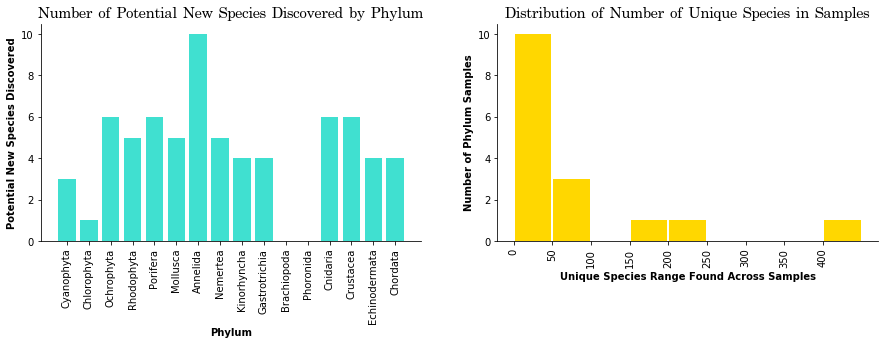

In [670]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
BioMar = pd.read_csv('data/BioMar.csv')
fig = plt.figure(figsize=(15,4)) 


ax = plt.subplot(1,2,1)
bar = BioMar.drop(['Biomar_samples', 'Biomar_species','New_to_ACG','New_to_Costa_Rica','Total_species_ACG'], axis=1) 
bar = bar.drop(bar.index[[5,6,7,8,9,17,18,19,20,21,22,23,24,25]])
bar = bar.set_index(['Taxonomic _group'])
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y = bar["Poss_New_species"]
plt.bar(x, y, color = 'turquoise')
xticks_lab = bar.index.str.replace("_TOTAL","") 
plt.xticks(x, xticks_lab,rotation='vertical') 
plt.title('Number of Potential New Species Discovered by Phylum', fontname='AppleMyungjo', size =15, fontweight="bold")
plt.xlabel('Phylum',fontweight="bold",size =10)
plt.ylabel('Potential New Species Discovered',fontweight="bold",size =10)
ax.spines['right'].set_visible(False)             
ax.spines['top'].set_visible(False)



ax1 = plt.subplot(1,2,2)
hist = pd.DataFrame(BioMar)
hist = hist.drop(['Taxonomic _group','New_to_Costa_Rica','New_to_ACG','Poss_New_species','Total_species_ACG'], axis=1)
hist = hist.drop(hist.index[[5,6,7,8,9,17,18,19,20,21,22,23,24,25]])
#ax1 = plt.subplot()
x1 = hist['Biomar_species']
plt.hist(x1, bins=[0,50,100,150,200,250,300,350,400,450], align="mid", rwidth =0.95, color = 'gold')
plt.xticks(np.arange(0, 450, 50), rotation='vertical')
ax1.spines['right'].set_visible(False)             
ax1.spines['top'].set_visible(False)
plt.title('Distribution of Number of Unique Species in Samples', fontname='AppleMyungjo', size =15, fontweight="bold")
plt.xlabel('Unique Species Range Found Across Samples',fontweight="bold",size =10)
plt.ylabel('Number of Phylum Samples',fontweight="bold",size =10)

fig.savefig('Mulders_Fig_1.pdf')
plt.show()


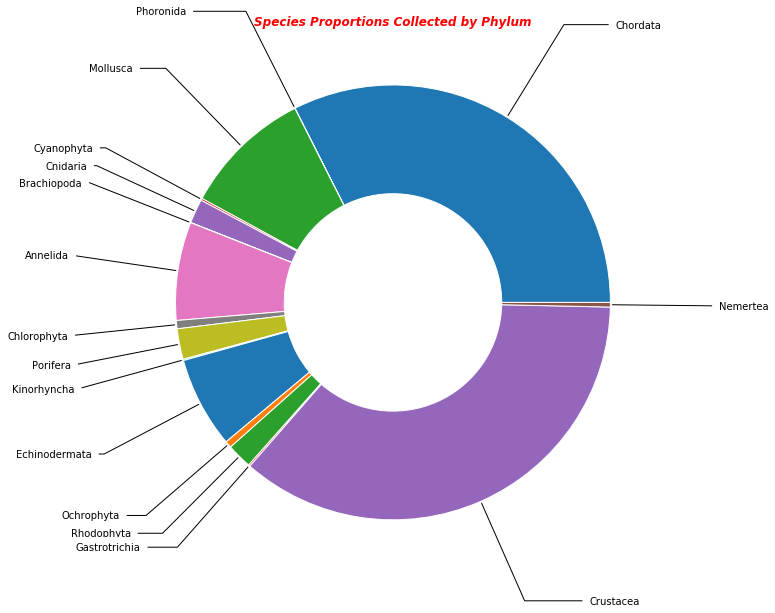

In [671]:
import numpy as np
from random import shuffle

pie = pd.DataFrame(BioMar)

pie = pie.drop(pie.index[[5,6,7,8,9,17,18,19,20,21,22,23,24,25]])
pie = pie.reindex([29,16,10,0,26,15,11,1,4,13,28,2,3,14,27,12])
labels = pie['Taxonomic _group']
labels = labels.str.replace("_TOTAL","") 
labels = labels.tolist()
data = pie['Biomar_samples']

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, labeldistance = 0.5)

for w in wedges:
    w.set_linewidth(1)
    w.set_edgecolor('white')

bbox_props = dict(boxstyle="square, pad=0.5", fc="w", ec="white", lw=0.72)
kw = dict(xycoords='data', textcoords='data',  arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(x + np.sign(x)*.5, y*1.5),
             horizontalalignment=horizontalalignment, **kw)

plt.title('Species Proportions Collected by Phylum',fontweight ='bold', color ='red', style = 'italic')   
fig.savefig('Mulders_Fig_2.pdf')
plt.show()

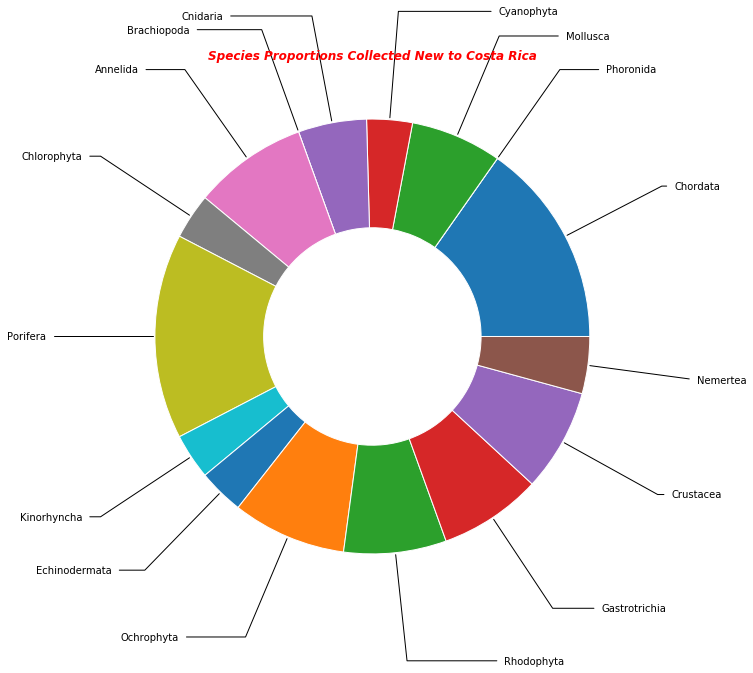

In [672]:
import numpy as np
from random import shuffle

pie = pd.DataFrame(BioMar)

pie = pie.drop(pie.index[[5,6,7,8,9,17,18,19,20,21,22,23,24,25]])
pie = pie.reindex([29,16,10,0,26,15,11,1,4,13,28,2,3,14,27,12])
labels = pie['Taxonomic _group']
labels = labels.str.replace("_TOTAL","") 
labels = labels.tolist()
data = pie['New_to_Costa_Rica']

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, labeldistance = 0.5)

for w in wedges:
    w.set_linewidth(1)
    w.set_edgecolor('white')

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="white", lw=0.72)
kw = dict(xycoords='data', textcoords='data',  arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(x + np.sign(x)*.5, y*1.5),
             horizontalalignment=horizontalalignment, **kw)

plt.title('Species Proportions Collected New to Costa Rica',fontweight ='bold', color ='red', style = 'italic')   
fig.savefig('Mulders_Fig_3.pdf')
plt.show()


![TJU logo](images/TJU_logo_image.png "TJU logo")



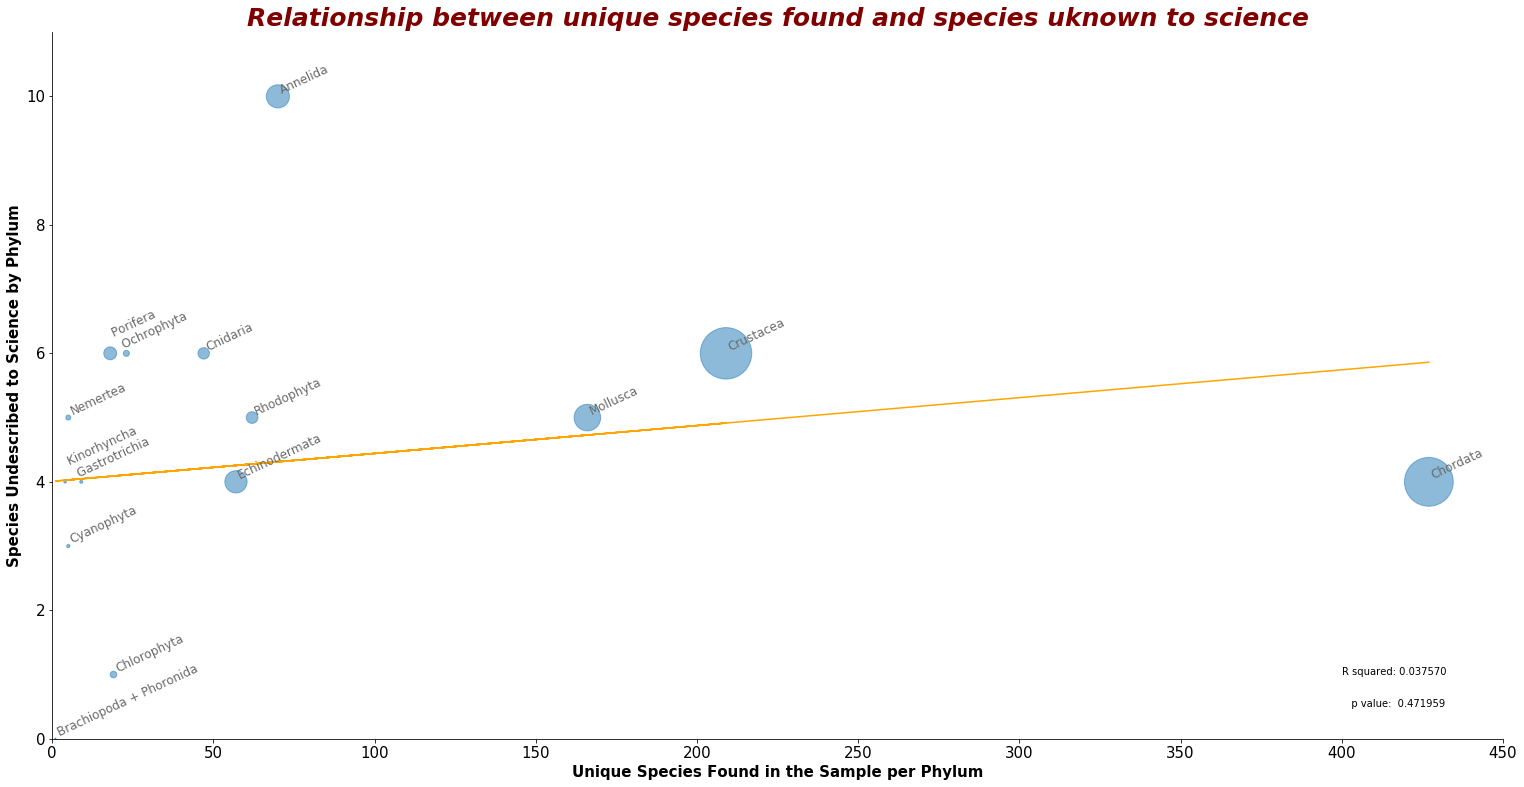

In [673]:
from scipy import stats 

#df
BioMar = pd.read_csv('data/BioMar.csv')
scat = BioMar.drop(['New_to_Costa_Rica', 'New_to_ACG','Total_species_ACG'], axis=1)
scat = scat.drop(BioMar.index[[5,6,7,8,9,17,18,19,20,21,22,23,24,25]])
scat = scat.reset_index(drop=True)
#print(scat)

x = scat['Biomar_species']                      
y = scat['Poss_New_species']                      
z = scat['Biomar_samples']                     
c = scat['Taxonomic _group'].str.replace("_TOTAL","").str.replace("Brachiopoda","").str.replace('Phoronida','Brachiopoda + Phoronida').str.replace("Ochrophyta","").str.replace('Porifera','Porifera \n Ochrophyta').str.replace("Gastrotrichia","").str.replace('Kinorhyncha','Kinorhyncha \n Gastrotrichia')



#plot
fig = plt.figure(figsize = (26,13))
ax = plt.axes()
plot = plt.scatter(x,y, s = z/1, alpha =0.5)     
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)   
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0,11)                                 
plt.xlim(0,450)      

#labeling dots and attempting to avoid overlap

for i in range(len(x)):                      
    plt.text(x[i],y[i],c[i], fontsize = 12, rotation=25, color = 'dimgray',ha='left', va='bottom')    
    
#stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)   
line = slope*x + intercept #not sure how useful this is here                                         
plt.plot(x, line, color = 'orange')                                                                                                                                                      
plt.text(400,1,('R squared: %f'% r_value**2))  
plt.text(400,0.5,('   p value:  %f'% p_value))   

#customizing
ax.spines['right'].set_visible(False)             
ax.spines['top'].set_visible(False)
plt.ylabel('Species Undescribed to Science by Phylum',fontsize = 15,fontweight = 'bold')
plt.xlabel('Unique Species Found in the Sample per Phylum',fontsize = 15, fontweight = 'bold')
plt.title('Relationship between unique species found and species uknown to science',fontweight ='bold',fontsize = 25, color ='maroon', style = 'italic') 

fig.savefig('Mulders_Fig_4.pdf')
plt.show()

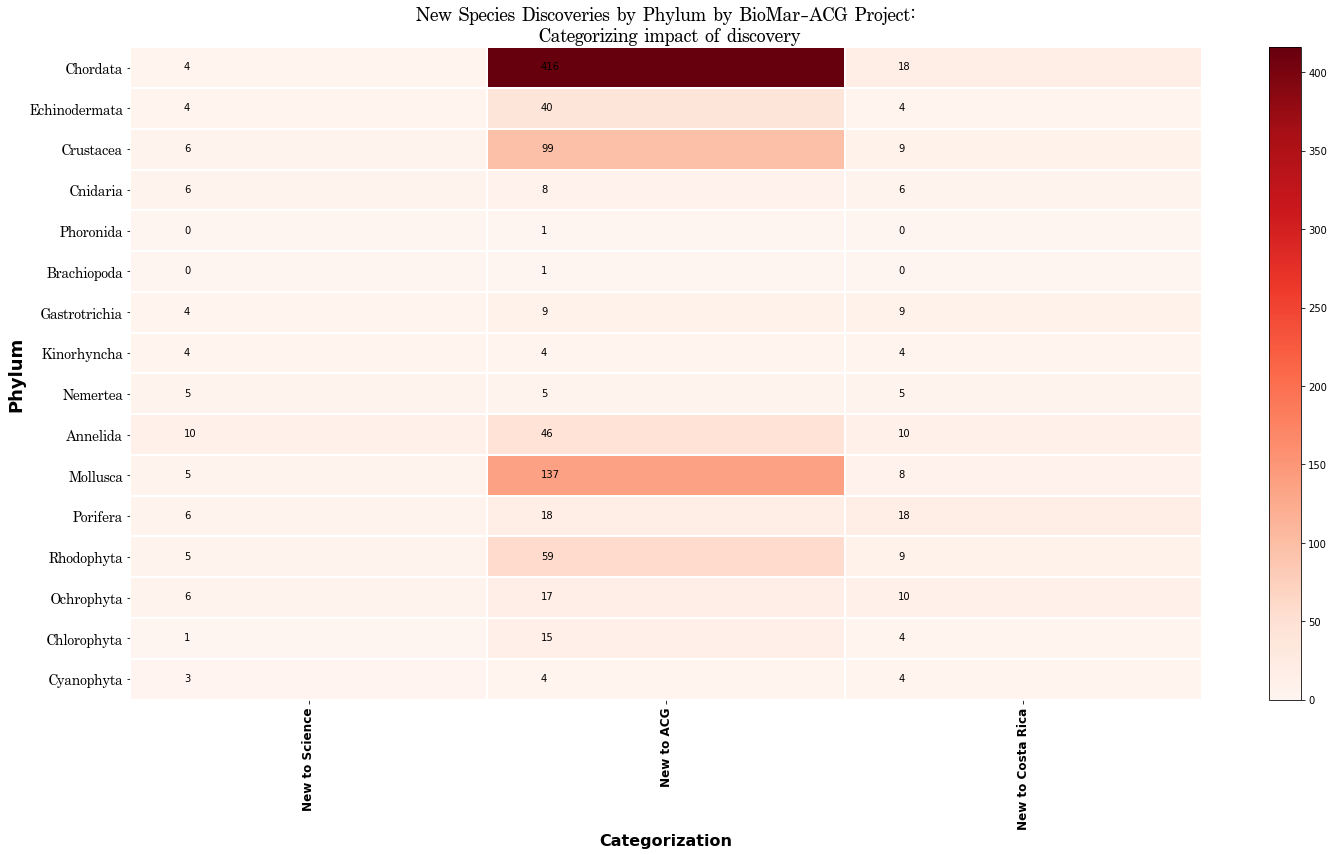

In [674]:
heat = pd.DataFrame(BioMar)
heat = BioMar.drop(['Biomar_samples', 'Biomar_species','Total_species_ACG'], axis=1) 
heat = heat.drop(heat.index[[5,6,7,8,9,17,18,19,20,21,22,23,24,25]])
heat = heat.set_index(['Taxonomic _group'])

fig = plt.figure( figsize = (24,12))
ax = plt.subplot()

plt.pcolormesh(heat, cmap = 'Reds', edgecolor = 'white', alpha = 1.0)
plt.colorbar()

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

for i in range(len(heat.index)):
    for j in range(len(heat.columns)):
        plt.text(j+0.15,i+0.45,heat.iloc[i,j])


plt.yticks(np.linspace(0.5, len(heat.index)-0.5, len(heat.index)), heat.index.str.replace("_TOTAL","") , fontname='AppleMyungjo', size =14)
plt.xticks(np.linspace(0.5, len(heat.columns)-0.5, len(heat.columns)), heat.columns.str.replace("Poss_New_species", "New to Science").str.replace("New_to_ACG", "New to ACG").str.replace('New_to_Costa_Rica','New to Costa Rica'),fontname='DejaVu Sans', size =12, rotation='vertical',fontweight='bold')
plt.title('New Species Discoveries by Phylum by BioMar-ACG Project:\n Categorizing impact of discovery', fontname='AppleMyungjo', size =18, fontweight="bold")

plt.ylabel('Phylum', fontweight='bold', size=18)
plt.xlabel('Categorization',fontweight='bold', size=16)
fig.savefig('Mulders_Fig_5.pdf')
plt.show()

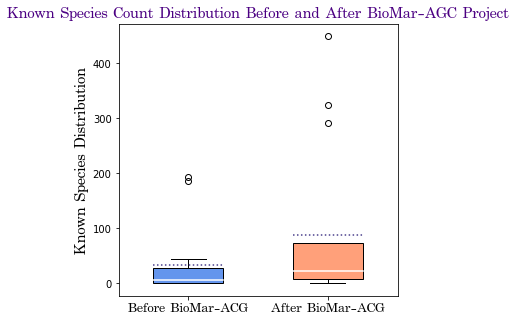

In [675]:
import pandas as pd

box = pd.DataFrame(BioMar)
box = box.drop(['Biomar_samples','Taxonomic _group', 'Biomar_species','Poss_New_species','New_to_Costa_Rica'], axis=1) 
box = box.drop(box.index[[5,6,7,8,9,17,18,19,20,21,22,23,24,25]])
box['Before_BioMar'] = box['Total_species_ACG'] - box['New_to_ACG']
#box = box.drop(['New_to_ACG'])


data = [box['Before_BioMar'], box['Total_species_ACG']]        
xticks_lab = ['Before BioMar-ACG', 'After BioMar-ACG']


median_line = {'color':'white',
              'linewidth': 1.5}                  
mean_line = {'color':'darkslateblue',                     
             'linestyle':'dotted',              
             'linewidth': 1.5}                   

fig, ax = plt.subplots(figsize=(5,5))
box1 = plt.boxplot(data, patch_artist=True, widths = 0.5, showmeans = True, meanline = True, meanprops = mean_line, medianprops = median_line)
plt.xticks([1,2], xticks_lab, fontsize = 13,fontname='AppleMyungjo') 

colors = ['cornflowerblue', 'lightsalmon']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
                                           
                                        
plt.ylabel('Known Species Distribution', fontsize = 15, fontweight = 'bold',fontname='AppleMyungjo')
#plt.xlabel('Timeline', fontsize = 15 ,fontname='AppleMyungjo',fontweight = 'bold')
plt.title('Known Species Count Distribution Before and After BioMar-AGC Project', fontname='AppleMyungjo',fontsize = 15, fontweight = 'bold',  color = 'indigo')
fig.savefig('Mulders_Fig_6.pdf')
plt.show()